In [1]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

print(device)

cpu


In [2]:
IMAGENET_PATH = '/Users/darshangadkari/Documents/Homeopath/data'
# Data loading code
train_data_dir = f'{IMAGENET_PATH}/trainDrSK'
test_data_dir = f'{IMAGENET_PATH}/testDrSK'

In [6]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
normalize

Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [7]:
from random import shuffle, seed

In [8]:
seed(10);
shuffle(fpaths)

In [107]:
class Eczema(Dataset):
    def __init__(self, folder):
        asteoticXeroticDryCrackedEczema = glob(folder+'/Asteotic-Xerotic-dry-cracked Eczema/*.*')
        atopicDermatitis = glob(folder+'/Atopic Dermatitis/*.*')
        # asteoticXeroticDryCrackedEczema = glob(folder+'/Contact-Dermatitis or Eczema Acute Dermatitis/*.*')
        # atopicDermatitis = glob(folder+'/Contact-Dermatitis or Eczema/*.*')
        self.fpaths = asteoticXeroticDryCrackedEczema[:500] + atopicDermatitis[:500]
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
        from random import shuffle, seed; seed(10); shuffle(self.fpaths)
        self.targets = [fpath.split('/')[-1].startswith('eczema') for fpath in self.fpaths] 
    def __len__(self): return len(self.fpaths)
    def __getitem__(self, ix):
        f = self.fpaths[ix] #prints path like ../input/cat-and-dog/training_set/training_set/dogs/dog.3600.jpg
        target = self.targets[ix]
        im = (cv2.imread(f)[:,:,::-1])
        im = cv2.resize(im, (224,224))
        im = torch.tensor(im/255)
        im = im.permute(2,0,1)
        im = self.normalize(im) 
        return im.float().to(device), torch.tensor([target]).float().to(device)


In [95]:
data = Eczema(train_data_dir)

In [119]:
data.__len__()

18

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.])
Contact-Dermatitis or Eczema


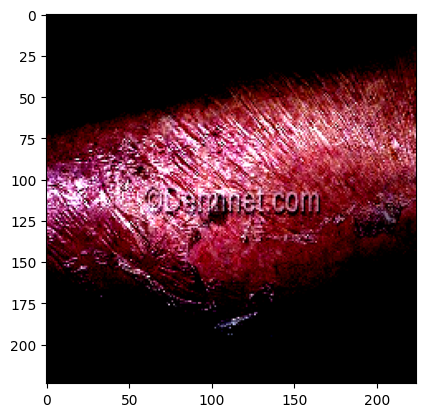

In [118]:
im, label = data[-3]
# permute is to just keep it in the matplotlib way to display it
plt.imshow(im.permute(1,2,0).cpu())
print(label)
if label:
    print("Contact-Dermatitis or Eczema Acute Dermatitis")
else:
    print("Contact-Dermatitis or Eczema")

In [108]:
def get_model():
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.fc = nn.Sequential(nn.Flatten(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 1),
    nn.Sigmoid())
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3)
    return model.to(device), loss_fn, optimizer

In [62]:
!pip install torch_summary

In [109]:
from torchsummary import summary
model, criterion, optimizer = get_model()
summary(model, torch.zeros(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        (128)
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-1                   [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-2                   [-1, 64, 56, 56]  

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        (128)
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-1                   [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-2                   [-1, 64, 56, 56]  

In [64]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [86]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    is_correct = (prediction > 0.5) == y
    return is_correct.cpu().numpy().tolist()

In [102]:
def get_data():
    train = Eczema(train_data_dir)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True, drop_last = True)
    val = Eczema(test_data_dir)
    val_dl = DataLoader(val, batch_size=32, shuffle=True, drop_last = True)
    return trn_dl, val_dl

In [110]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [111]:
train_losses, train_accuracies = [], []
val_accuracies = []

In [114]:
print("All losses and accuracies are for each epoch")
for epoch in range(10):
    
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies = []

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        val_epoch_accuracies.extend(val_is_correct)
    val_epoch_accuracy = np.mean(val_epoch_accuracies)

    print(f" epoch {epoch + 1}/1, Training Loss: {train_epoch_loss}, Training Accuracy: {train_epoch_accuracy}, Validation Accuracy: {val_epoch_accuracy}")
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_accuracies.append(val_epoch_accuracy)


All losses and accuracies are for each epoch
 epoch 1/1, Training Loss: 0.22284900148709616, Training Accuracy: 0.8958333333333334, Validation Accuracy: 0.90625
 epoch 2/1, Training Loss: 0.2189177672068278, Training Accuracy: 0.875, Validation Accuracy: 0.875
 epoch 3/1, Training Loss: 0.18275834123293558, Training Accuracy: 0.9375, Validation Accuracy: 0.875
 epoch 4/1, Training Loss: 0.1563322345415751, Training Accuracy: 0.9479166666666666, Validation Accuracy: 0.9375
 epoch 5/1, Training Loss: 0.16608733435471854, Training Accuracy: 0.9791666666666666, Validation Accuracy: 0.9375
 epoch 6/1, Training Loss: 0.13285601139068604, Training Accuracy: 0.9583333333333334, Validation Accuracy: 0.921875
 epoch 7/1, Training Loss: 0.1424419085184733, Training Accuracy: 0.9479166666666666, Validation Accuracy: 0.9375
 epoch 8/1, Training Loss: 0.13199827075004578, Training Accuracy: 0.96875, Validation Accuracy: 0.9375
 epoch 9/1, Training Loss: 0.09424736599127452, Training Accuracy: 0.9895

In [115]:
epochs = np.arange(15)+1
epochs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [71]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

/var/folders/yc/6m4dmb510jq9178y5swqt1x00000gn/T/ipykernel_42682/2498189628.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


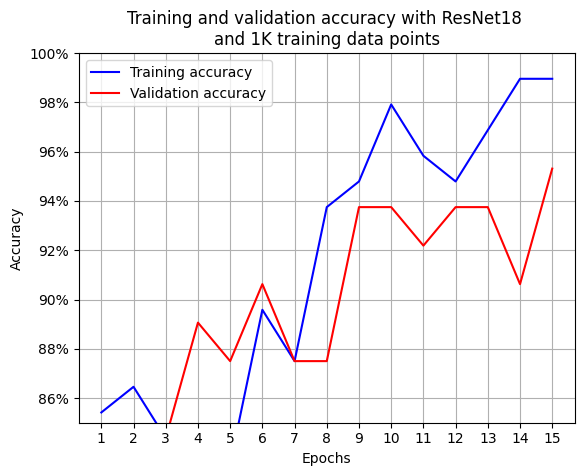

In [116]:
plt.plot(epochs, train_accuracies, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with ResNet18 \nand 1K training data points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.85,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [117]:
scripted_module = torch.jit.script(model)
# Export full jit version model (not compatible lite interpreter), leave it here for comparison
scripted_module.save("resnet18_scripted.pt")
# Export lite interpreter version model (compatible with lite interpreter)
scripted_module._save_for_lite_interpreter("resnet18.pt")